In [3]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

In [18]:
pop_df=pd.read_csv(r'C:\Users\Yasaman\Downloads\World_bank_population.csv',skiprows=3)
pop_df=pop_df[['Country Code','2019']].dropna()
pop_df['2019']=pop_df['2019'].astype(int)
possible_countries=pop_df.query(" `2019` >=1000000")['Country Code'].values

In [19]:

Country_list={'Egypt':'EGY', 'Tunisia':'TUN','Libya':'LBY','Syria':'SYR','Yemen':'YEM','Bahrain':'BHR','Jordan':'JOR','Kuwait':'KWT','Morocco':'MAR','Oman':'OMN'}
rev_Country_list={Country_list[key]: key for key in Country_list}
abbr=[country.lower() for country in Country_list.values()]
c_list=list(Country_list.values())
years=np.arange(2002, 2020, 1)
df=pd.read_csv(r"C:\Users\Yasaman\Arab_spring_scholarly_attention\Data\Migration\scopus_2024_V1_scholarlymigration_countryflows_enriched_new.csv")
df=df[df['year'].isin(years)].reset_index(drop=True)

In [20]:
religion_df=pd.read_csv(r'C:\Users\Yasaman\Arab_spring_scholarly_attention\Data\Religion\cleaned_religion.csv')
df=df.merge(religion_df, left_on='iso3codeto', right_on='name_iso')
df=df[df['name_iso'].isin(possible_countries)].reset_index(drop=True)

In [21]:

years_before=np.arange(2002, 2011, 1)
years_after=np.arange(2011, 2020, 1)
world_before=df[df['year'].isin(years_before)].groupby('most_religion')['n_migrations'].sum().reset_index().rename(columns={'n_migrations':'world(Pre-Arabspring)'})
world_after=df[df['year'].isin(years_after)].groupby('most_religion')['n_migrations'].sum().reset_index().rename(columns={'n_migrations':'world(Post-Arabspring)'})


target_before=df[(df['year'].isin(years_before))&(df['iso3codefrom'].isin(c_list))].groupby('most_religion')['n_migrations'].sum().reset_index().rename(columns={'n_migrations':'Target(Pre-Arabspring)'})
target_after=df[(df['year'].isin(years_after))&(df['iso3codefrom'].isin(c_list))].groupby('most_religion')['n_migrations'].sum().reset_index().rename(columns={'n_migrations':'Target(Post-Arabspring)'})
res=world_after.merge(target_after).merge(world_before).merge(target_before)


In [22]:
for col in res.columns[1:]:
    res[col]/=sum(res[col])
res.index=res.most_religion
del res['most_religion']

res=res.transpose().reset_index()

In [23]:
res

most_religion,index,Buddhism,Christianity,Hindu,Islam,Judaism,Non. Religious,Shinto,Syncretic Religions
0,world(Post-Arabspring),0.019829,0.750568,0.021921,0.085394,0.007356,0.023312,0.024441,0.067181
1,Target(Post-Arabspring),0.003157,0.473493,0.017726,0.461271,0.000890,0.007851,0.021125,0.014488
2,world(Pre-Arabspring),0.016166,0.810636,0.016356,0.051371,0.007502,0.023618,0.036103,0.038248
3,Target(Pre-Arabspring),0.002879,0.598049,0.019994,0.335253,0.000960,0.006398,0.031830,0.004639


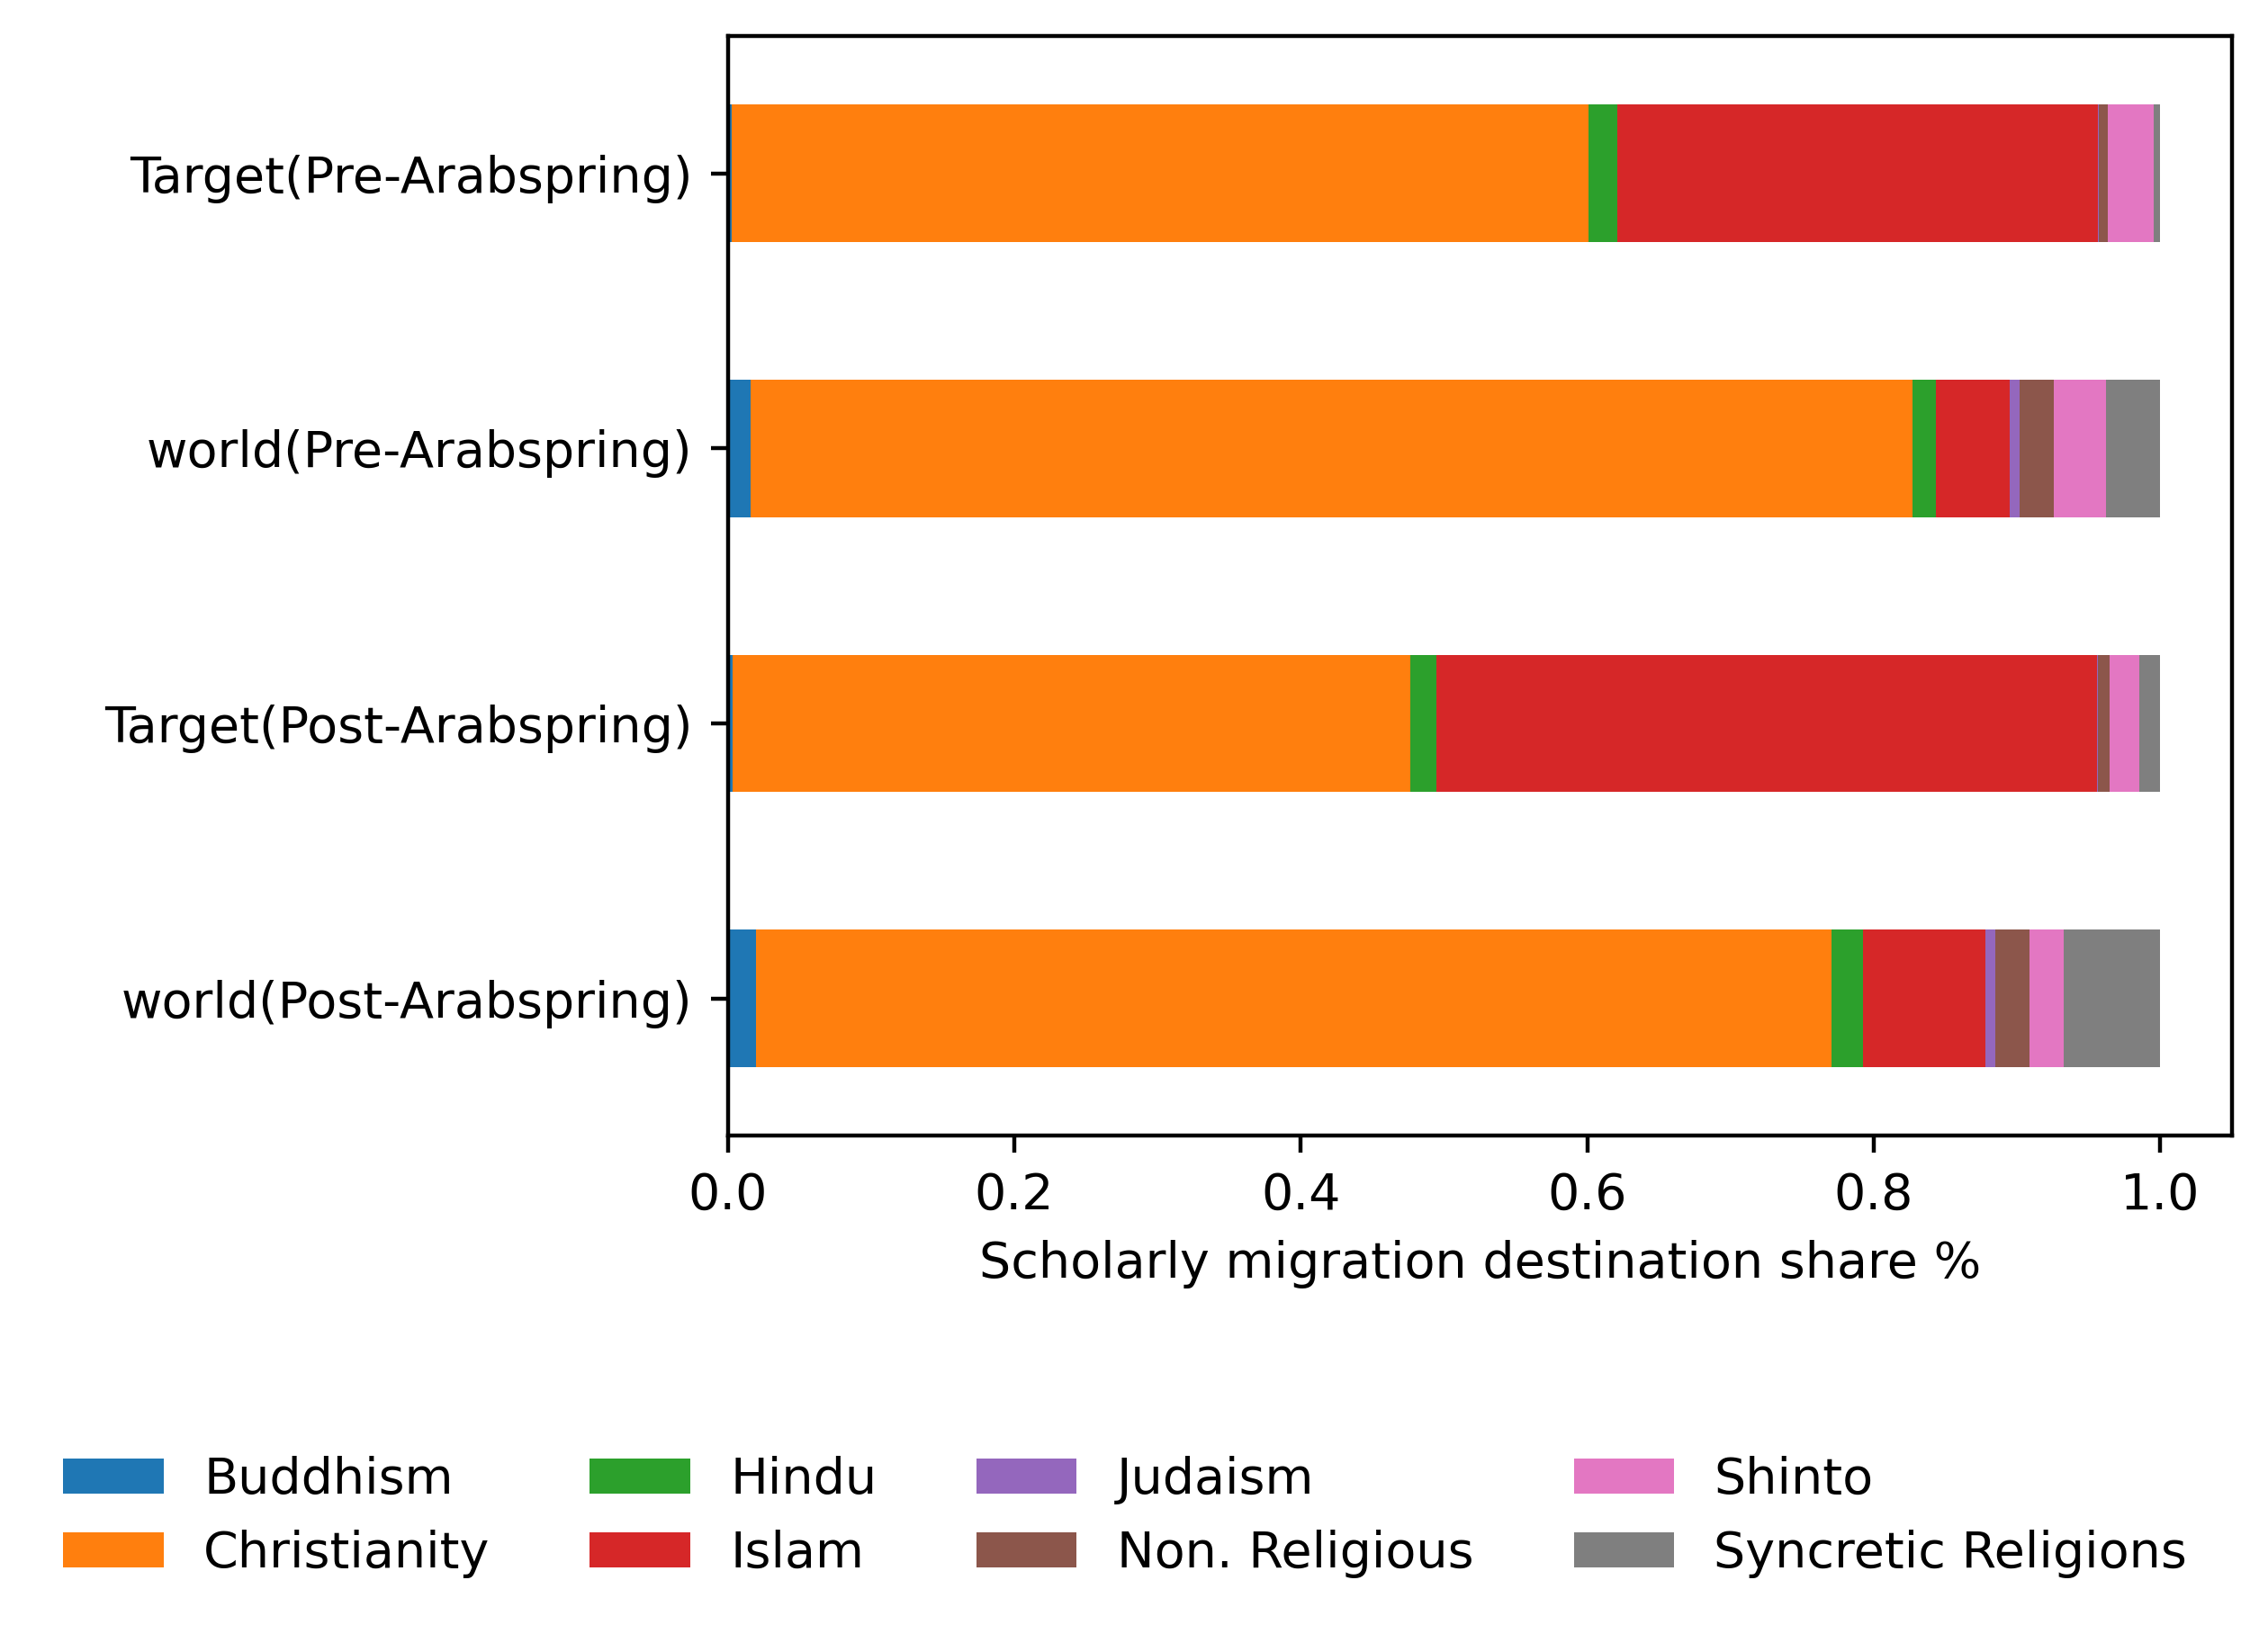

In [24]:
fig, ax=plt.subplots(nrows=1, ncols=1, dpi=400)
res.plot(x='index', kind='barh', stacked=True, ax=ax)
ax.set_xlabel('Scholarly migration destination share %')
ax.set_ylabel(' ')
# Put the legend outside the plot area
lgd=ax.legend( bbox_to_anchor=(1, -.25), ncol=4, frameon=False)
fig.tight_layout()
fig.savefig('Religion_and_migration.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')